<a href="https://colab.research.google.com/github/Sangyeonglee353/ai-hongong/blob/main/Chapter_05_%ED%8A%B8%EB%A6%AC_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05-1. 결정 트리

## 로지스틱 회귀로 와인 분류하기

In [2]:
# 1. 와인 데이터 가져오기
import pandas as pd
wine = pd.read_csv('https://bit.ly//wine_csv_data')

In [3]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
# 각 열의 데이터 타입과 누락된 데이터 확인
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
# 열에 대한 간략한 통계 보기
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
# 2. 판다스 데이터프레임을 넘파이 배열로 바꾸기
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [7]:
# 3. 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [8]:
# 훈련 세트와 테스트 세트 크기 확인
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [9]:
# 4. 훈련 세트 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
# 5. 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [11]:
# 학습한 계수와 절편 출력
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


## 결정 트리

In [12]:
# 1. 결정 트리 모델 훈련
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42) # 실전에서는 지정 x
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


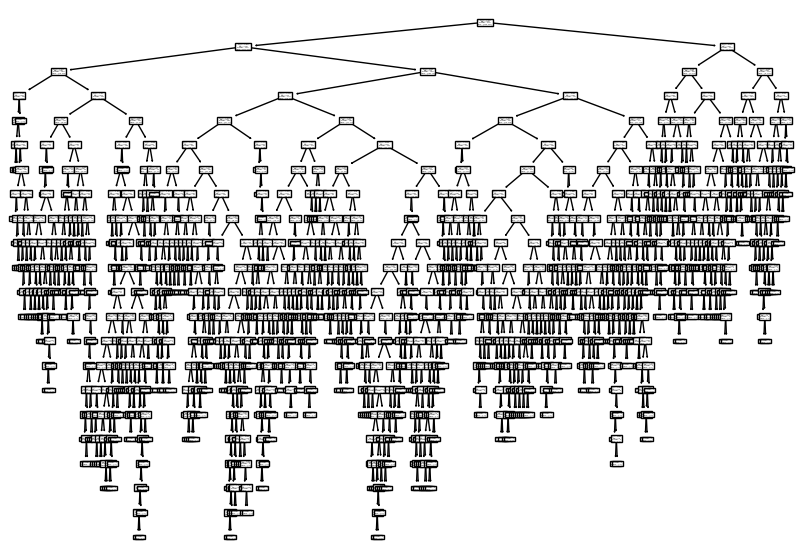

In [13]:
# 2. 결정 트리 모델 객체 출력
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

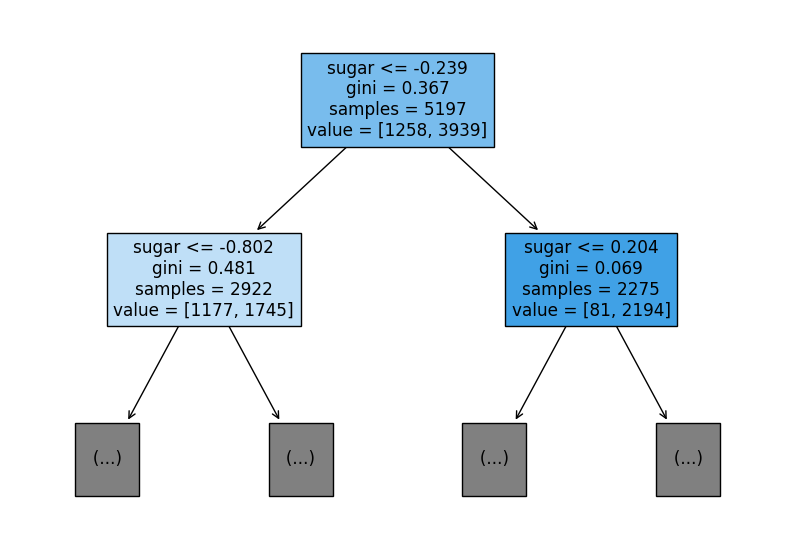

In [14]:
# 3. 트리 깊이를 제한해서 출력
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alchol', 'sugar', 'pH'])
plt.show()

In [15]:
# 4. max_depth 매개변수를 3으로 지정하여 모델 생성 | 가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


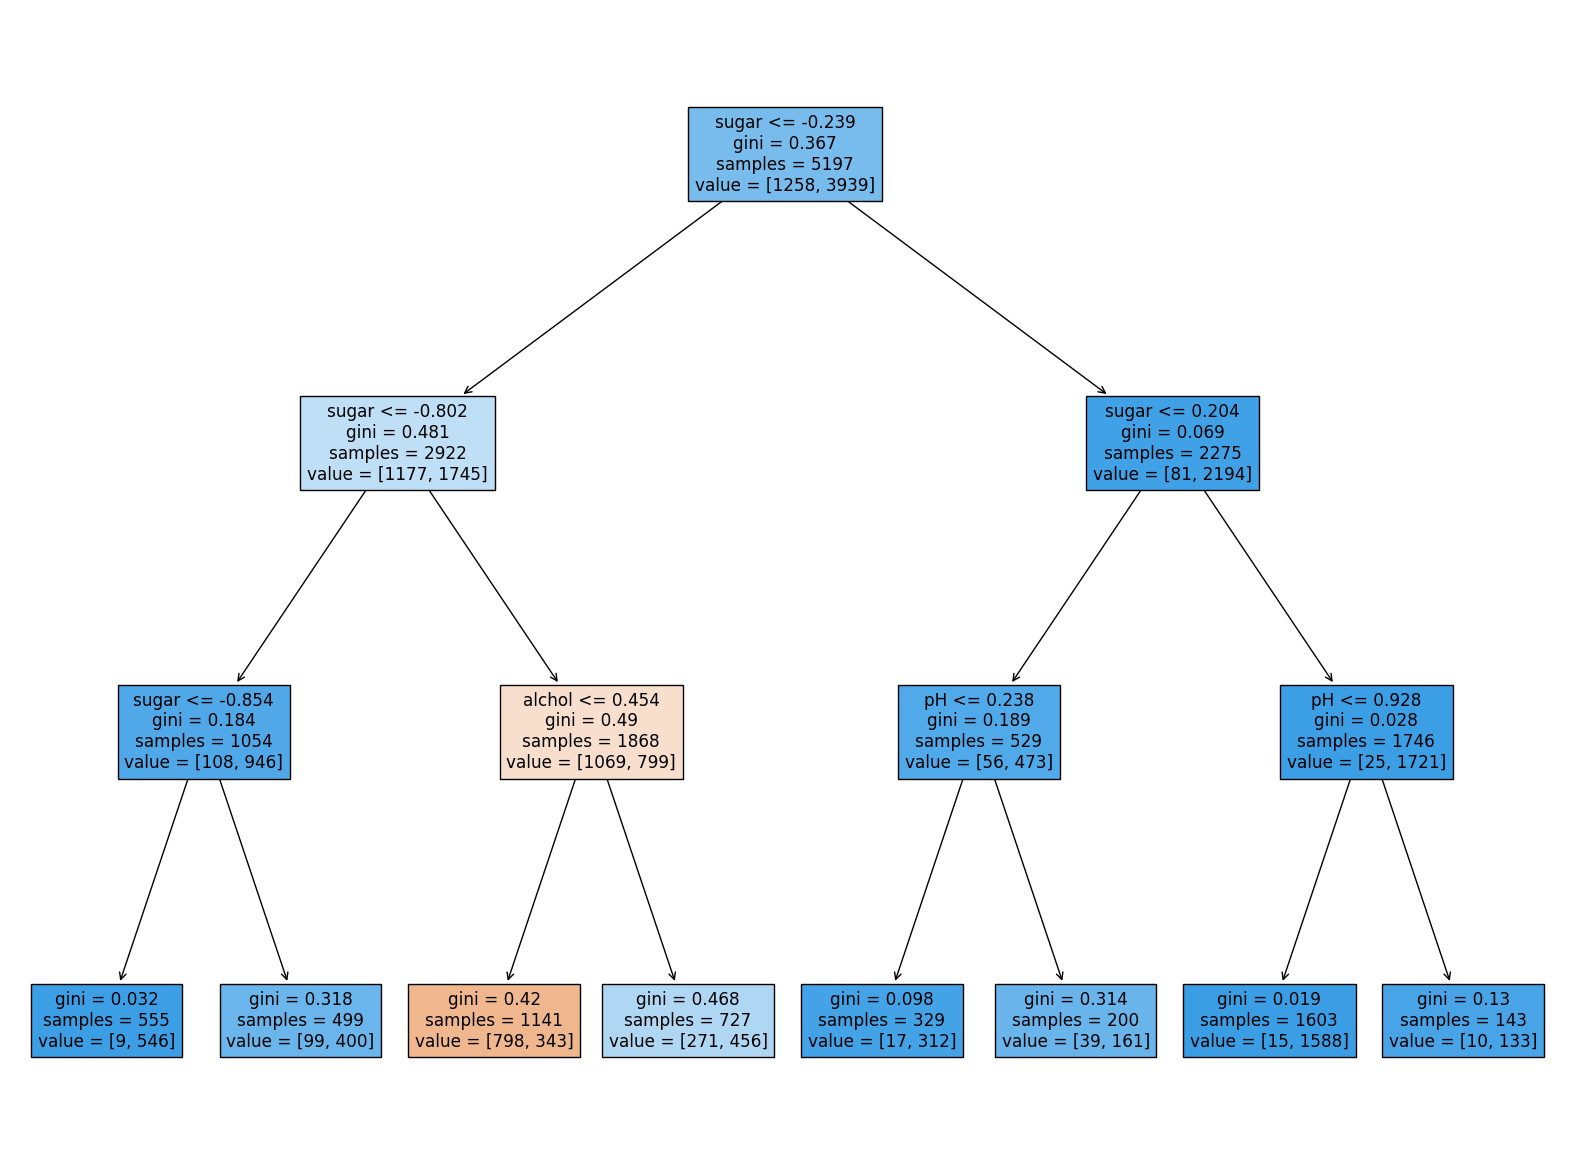

In [16]:
# 5. 생성 모델 출력
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alchol', 'sugar', 'pH'])
plt.show()

In [17]:
# 6. 전처리 전 훈련 세트와 테스트 세트로 결정 트리 모델 훈련
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


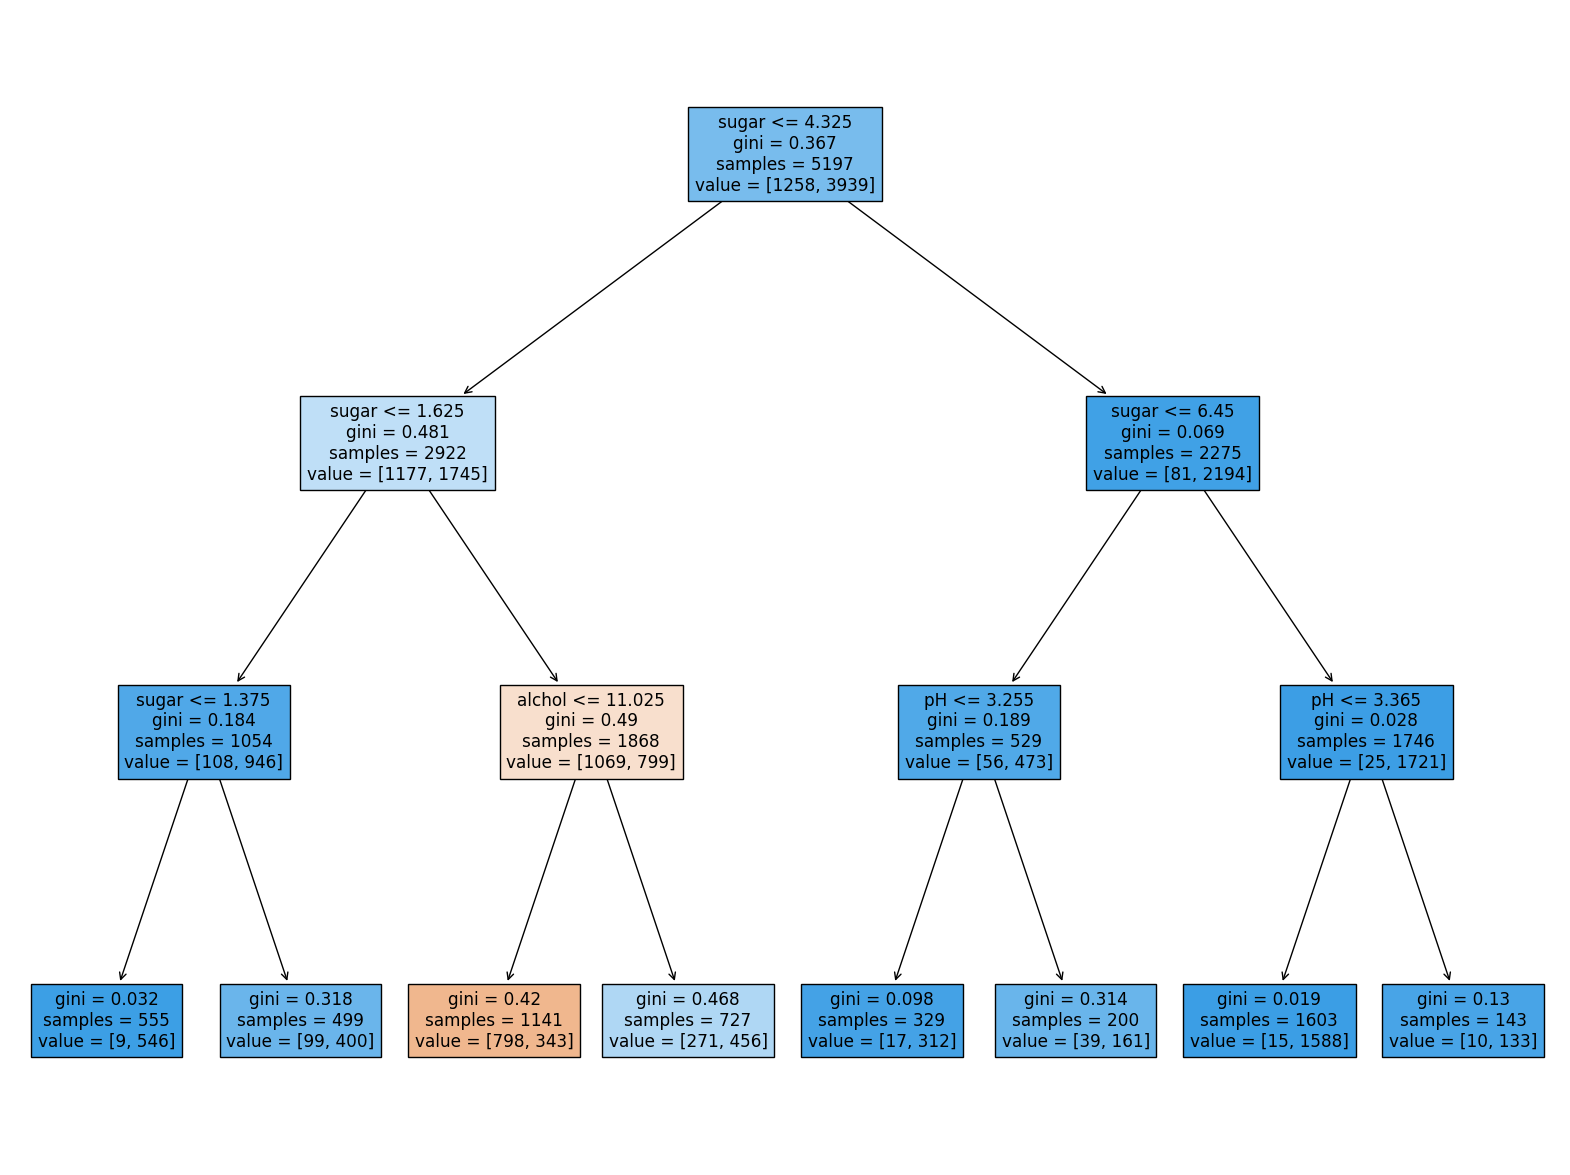

In [18]:
# 7. 트리 출력
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alchol', 'sugar', 'pH'])
plt.show()

In [19]:
# 8. 특성 중요도 출력(가장 유용한 특성)
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


## 확인 문제(05-1.3)

0.8874350586877044
0.8615384615384616


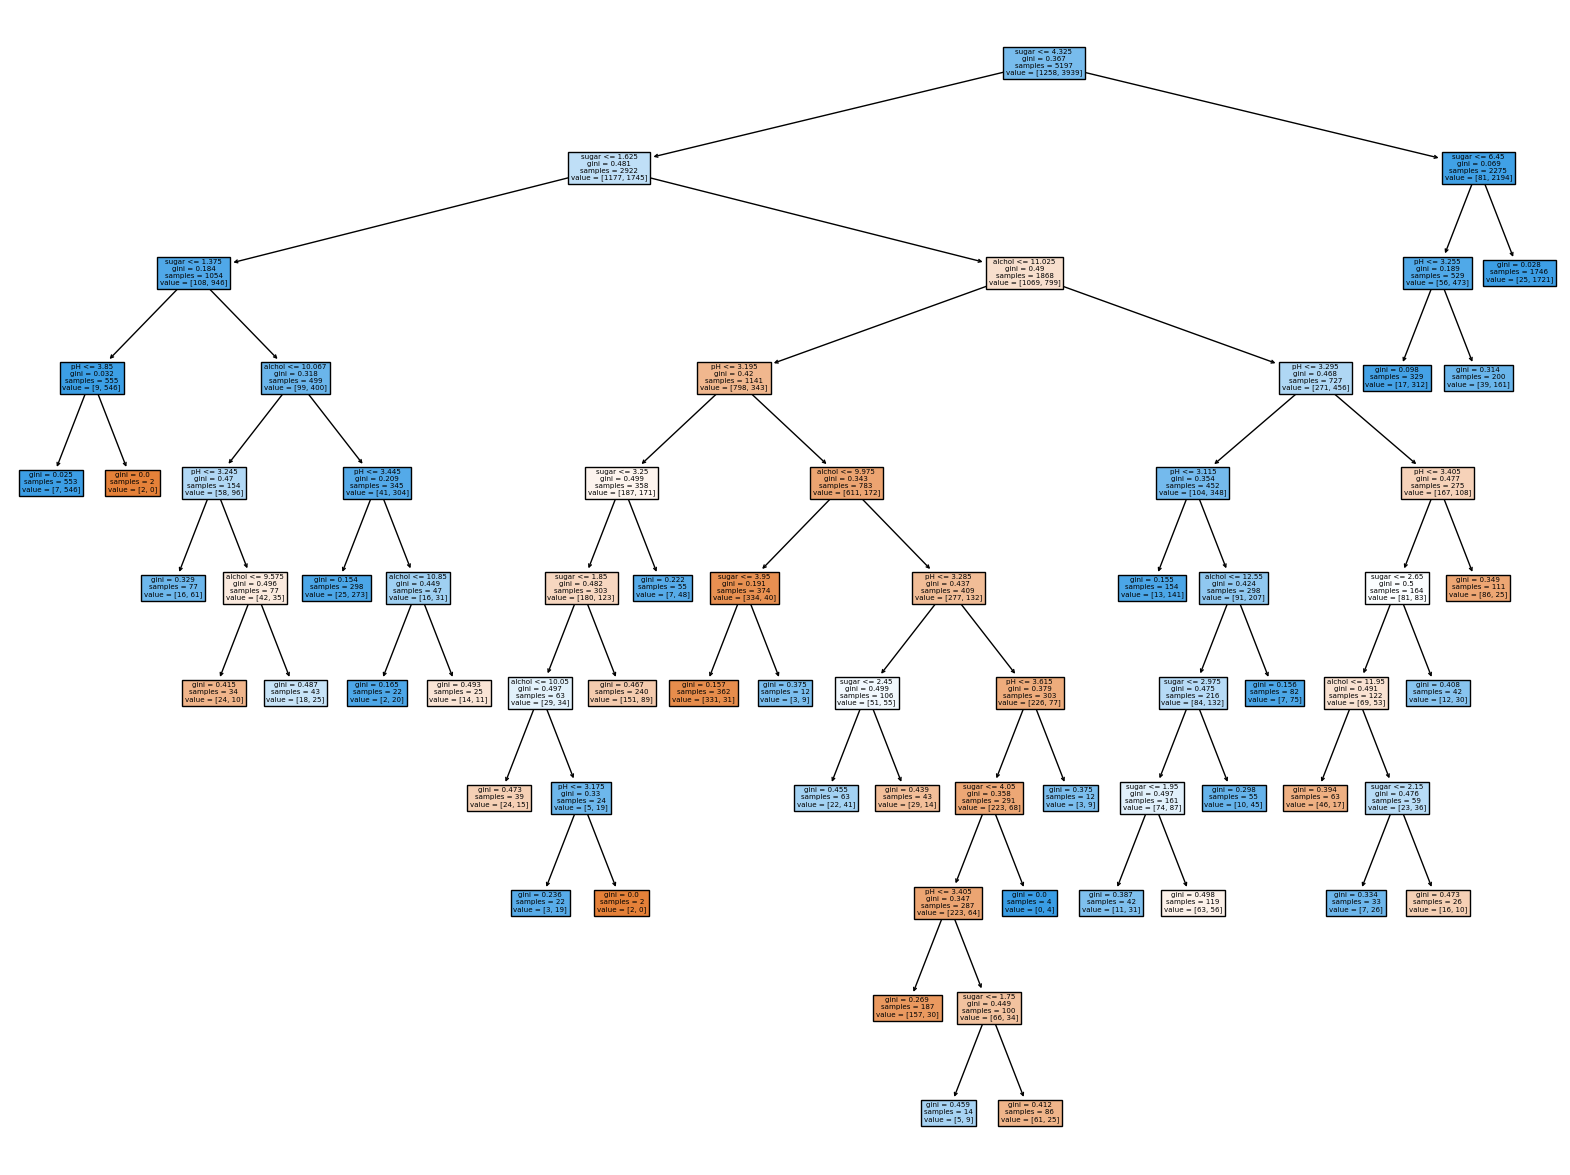

In [21]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alchol', 'sugar', 'pH'])
plt.show()

# 05-2. 교차 검증과 그리드 서치

## 검증 세트

In [79]:
# 1. 데이터 읽어오기
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [80]:
# 2. class열: target, 나머지 열: 특성 배열에 저장
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [81]:
# 3. 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [82]:
# 4. 훈련 세트를 쪼개어 검증 세트 만들기
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [83]:
# 5. 훈련 세트와 검증 세트 크기 확인
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [84]:
# 6. 모델 생성 및 평가 with 훈련, 검증 세트
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

# 결과: 훈련 세트에 과대적합

0.9971133028626413
0.864423076923077


## 교차 검증

In [85]:
# 1. cross_validate()을 이용해 교차 검증
# fit_time(모델 훈련 시간), score_time(검증 시간), test_score를 딕셔너리로 반환
# default: 5-폴드 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.01248741, 0.00738549, 0.00792646, 0.00773525, 0.01026416]), 'score_time': array([0.00152826, 0.00116467, 0.00125575, 0.0012176 , 0.00203443]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [86]:
# 2. 교차 검증의 최종 점수 = test_score의 (폴드 수)개의 점수 평균
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


In [87]:
# [번외] 교차 검증에서 훈련 세트 섞기
# 회귀 모델: KFold 분할기
# 분류 모델: StratifiedKFold 분할기
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [88]:
# [번외] 훈련 세트 섞기 -> 10-폴드 교차 검증 수행
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

### 결정 트리의 매개변수 값을 바꿔가며 가장 좋은 성능 모델 찾기
### 테스트 세트 대신 교차 검증을 통해 좋은 모델 선택

0.8574181117533719


## 하이퍼파라미터 튜닝



### 그리드 서치

In [89]:
# 1. 그리드 서치 준비
## 1.1 GridSearchCV 임포트
## 1.2 탐색할 매개변수와 탐색할 값의 리스트를 딕셔너리로 만듦.
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [90]:
# 2. GridSearchCV 클래스 <- 탐색 대상 모델과 params 변수 전달 = 그리드 서치 객체 만듦.
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [91]:
# 3. fit() 메서드로 호출
## 결정 트리 모델 min_impurity_decrease 값을 바꿔가며 총 (default) 5번 실행
## cv 매개변수: (default) 5 -> 5-폴드 교차 검증 수행
## 5 x 5 = 25개의 모델 훈련
## [참고]
## n_jobs 매개변수: (default) 1 / 병렬 실행에 사용할 CPU 코어 수 지정이 좋음. / -1: 모든 코어 사용
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [92]:
# 4. 그리드 서치는 25개의 모델 중에서 검증 점수가 가장 높은 모델의 매개변수 조합으로 전체 훈련 세트에서 자동으로 다시 모델 훈련
## 해당 모델 = gs.best_estimator_ 에 저장
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [93]:
# 5. 최적의 매개변수 확인(best_params_)
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [94]:
# 6. 5번의 교차 검증으로 얻은 점수 출력
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [95]:
# 7. 가장 큰 값의 인덱스 추출
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [96]:
# 8. 복잡한 매개변수 조합 탐색
# 8.1 min_impurity_decrease (노드를 분할하기 위한 불순도 감소 최소량)
# 8.2 max_depth (트리의 깊이)
# 8.3 min_samples_split (노드를 나누기 위한 최소 샘플 수)
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), # 9개
          'max_depth': range(5, 20, 1), # 15개
          'min_samples_split': range(2, 100, 10)} # 10개

# Total: 9 x 15 x 10 = 1,350개

In [97]:
# 9. 그리드 서치 실행
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [98]:
# 10. 최상의 매개변수 조합 확인
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [99]:
# 11. 최상의 교차 검증 점수 확인
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


### 랜덤 서치

In [100]:
# 1. scipy 임포트 | 2개의 확률 분포 클래스
from scipy.stats import uniform, randint

In [101]:
# randint / 사용방법_테스트: 10개
# 0~10 숫자 샘플링 = 랜덤 뽑기
rgen = randint(0, 10)
rgen.rvs(10)

array([5, 5, 4, 3, 1, 0, 9, 3, 5, 5])

In [102]:
# randibt / 사용방법_테스트 2: 1000개
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([104, 110,  87, 106,  90, 109, 101, 100,  91, 102]))

In [103]:
# uniform / 사용방법_테스트: 10개
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.78816768, 0.46651494, 0.14919658, 0.7825087 , 0.01956179,
       0.37449587, 0.84415877, 0.40423856, 0.05941373, 0.9165819 ])

In [106]:
# 2. 탐색할 매개변수 셋팅
# (추가) min_samples_left: 탐색 대상
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),}

In [107]:
# 3. 샘플링 횟수 지정: n_iter
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7925f63c7c40>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7925f63c4430>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7925f63c7520>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7925f63c53c0>},
                   random_state=42)

In [108]:
# 4. 최적의 매개변수 조합 출력
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [109]:
# 5. 최고의 교차 검증 검수 확인
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [110]:
# 6. 최종 모델의 테스트 성능 확인
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86


### 확인 문제(05-2.3)

In [112]:
# 1. splitter='random' 추가
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42, splitter='random'), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7925f63c7c40>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7925f63c4430>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7925f63c7520>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7925f63c53c0>},
                   random_state=42)

In [113]:
# 2. 최적의 매개변수 조합 출력
print(gs.best_params_)

{'max_depth': 43, 'min_impurity_decrease': 0.00011407982271508446, 'min_samples_leaf': 19, 'min_samples_split': 18}


In [114]:
# 3. 최고의 교차 검증 검수 확인
print(np.max(gs.cv_results_['mean_test_score']))

0.8458726956392981


In [115]:
# 4. 변경 모델의 테스트 성능 확인
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.786923076923077


In [116]:
# 전체 코드: https://bit.ly/hg-05-2

# Ch05-3. 트리의 앙상블

### 1. 랜덤 포레스트

In [118]:
# 1. 화이트 와인 분류 문제 풀기 with RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [122]:
# 2. cross_validate()로 교차 검증 수행
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score'])) # 결과: 훈련 세트에 다소 과대적합

0.9973541965122431 0.8905151032797809


In [123]:
# 3. 특성 중요도 출력
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [124]:
# 4. OOB 샘플로 부트스트랩 샘플로 훈련한 결정 트리 평가하기
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


### 2. 엑스트라 트리

In [126]:
# 5. 사이킷런에서 제공하는 엑스트라 트리를 사용하여 교차 검증 점수 확인
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [127]:
# 6. 특성 중요도 확인
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


### 3. 그레이디언트 부스팅

In [128]:
# 1. GradientBoostingClassifier를 사용해 와인 데이터셋의 교차 검증 점수 확인
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [131]:
# 2. 결정 트리 개수를 늘려 확인 > 결정 트리 개수를 늘려도 과대적합을 잘 억제함.
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [132]:
# 3. 특성 중요도 확인
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


### 4. 히스토그램 기반 그레디언트 부스팅

In [134]:
# 1. HistGradientBoostingClassifier 클래스 적용 > 과대적합을 잘 억제하면서 그레디언트 부스팅보다 조금 더 높은 성능 제공
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [136]:
# 2. 특성 중요도 계산 / permutation_importance() 사용
# (1) 특성 중요도(importances), (2) 평균(importances_mean), (3) 표준 편차(importances_std)
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [137]:
# 3. 테스트 세트에서 특성 중요도 계산
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [138]:
# 4. 테스트 세트에서의 성능 최종 확인
hgb.score(test_input, test_target)

0.8723076923076923

### XGBoost로 히스토그램 기반 그레디언트 부스팅 해보기

In [139]:
# 1. XGBoost 사용하기
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686


### LightGBM로 히스토그램 기반 그레디언트 부스팅 해보기

In [141]:
# 1. LightGBM 사용하기
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884


In [142]:
# 전체 코드: https://bit.ly/hg-05-03